# Assignment 1
## Exercise 2: k-NN Regression
First, I import the packages I'm going to use during the exercise: 
- [numpy](www.numpy.org)
- [matplotlib](http://matplotlib.org) 

And load and split the data into training/test and data/labels respectively:

In [42]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("src/polynomial200.csv", delimiter=',')

X_train = data[:100, :1]
y_train = data[:100, -1]
x_test = data[100:, :1]
y_test = data[100:, -1]

I plot the training and test set:

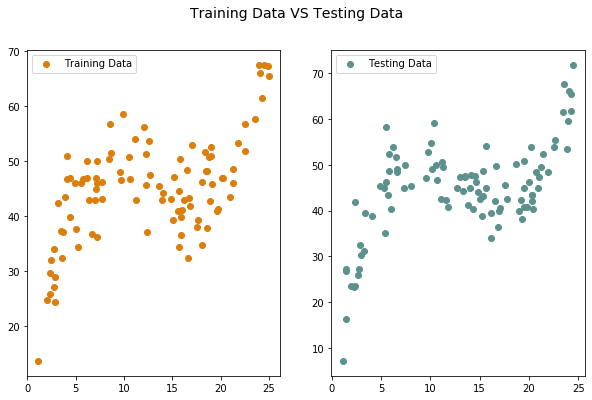

In [50]:
fig, ax = plt.subplots(1,2, figsize=(10, 6))

fig.suptitle('Training Data VS Testing Data', fontsize=14)
ax[0].scatter(X_train, y_train, c='#db7e0b', label="Training Data")
ax[1].scatter(x_test, y_test, c='#5c918d', label="Testing Data")
ax[0].legend()
ax[1].legend()

plt.show()

Here I have implemented my own k-NN regression. This time I have calculated the average of the K nearest neighbours labels:

In [44]:
def calculate_distance(X_train, x):
    return np.sum((x - X_train) ** 2, axis=1)

def knn(X_train, x, y_train, k): 
    
    #compute distances
    distances = calculate_distance(X_train, x)

    #get k nearest labels
    k_idx = np.argsort(distances)[:k]
    knn_labels = y_train[k_idx].mean()
    
    return knn_labels    

In [45]:
def predict(X, k):
    predicted_neighbour = [knn(X_train, x, y_train, k) for x in X]
    return np.array(predicted_neighbour)

I use my implementation to calculate the MSE training error for k=1,3,5,7 and plot the result:

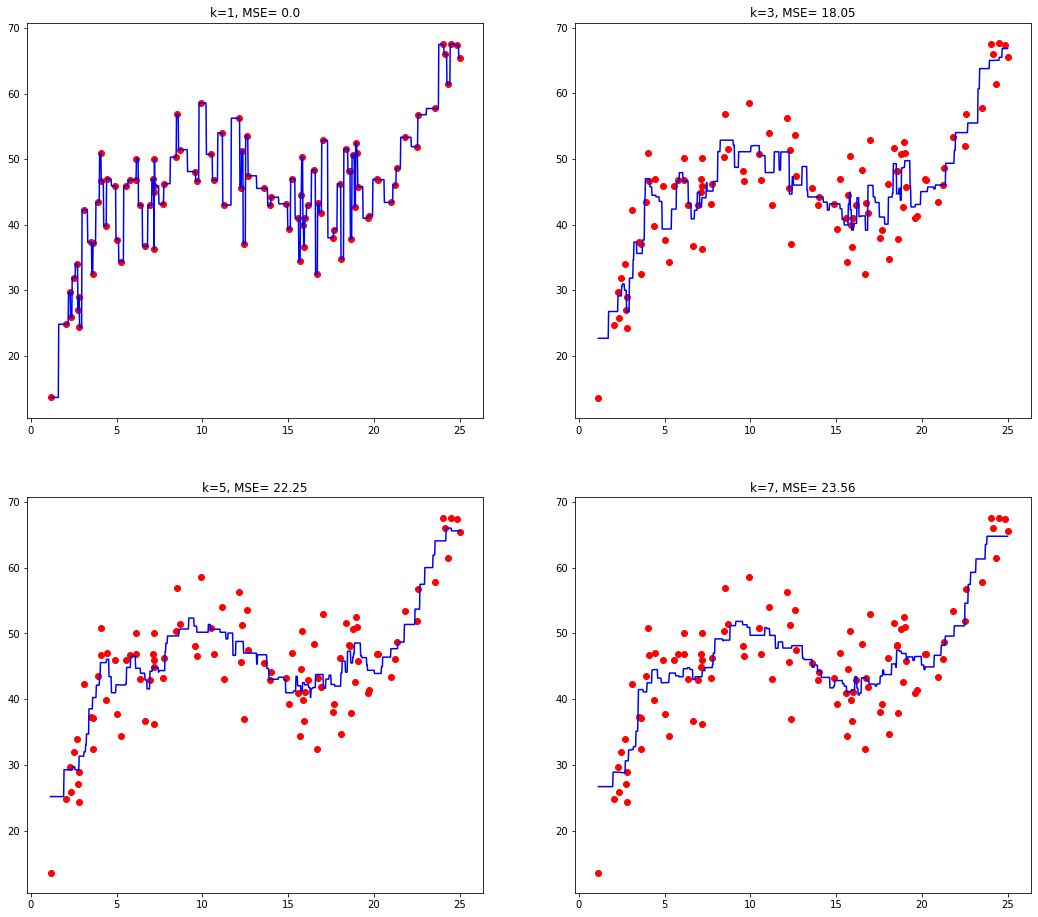

In [48]:
#interval to plot and create steps
x_min, x_max = X_train.min(), X_train.max()
h = (x_max - x_min)/1000
xx = np.arange(x_min, x_max, h)

fig1, ax1 = plt.subplots(2, 2, figsize=(18, 16))

for idx, k in zip(([0, 0], [0, 1], [1, 0], [1, 1]),
                        range(1, 8, 2)):
        
    #calculate the MSE training error
    train_predictions = predict(X_train, k)
    mse_training = np.mean(np.power(np.subtract(train_predictions, y_train), 2))
    
    #get prediction for xx interval
    predictions_xx = predict(xx, k)
    
    ax1[idx[0], idx[1]].plot(xx, predictions_xx, color= 'blue')
    ax1[idx[0], idx[1]].scatter(X_train, y_train, color= '#db7e0b')
    ax1[idx[0], idx[1]].set_title(f"k={k}, MSE= {round(mse_training, 2)}")       

plt.show()

In [47]:
print("MSE test error:\n")

for k in range(1, 8, 2):
    predictions = predict(x_test, k)
    mse_test = np.mean(np.power(np.subtract(predictions, y_test), 2))
    
    print(f"k={k}, MSE= {round(mse_test, 2)}")

MSE test error:

k=1, MSE= 49.24
k=3, MSE= 31.58
k=5, MSE= 28.48
k=7, MSE= 29.23


k = 5 produces the least MSE test error and in this case gives us the best results. For k = 1, the model overfits on the training data (see previous plot) which gives a high error on the test set. On the other hand, k = 7 performs poorly both in the training and the test set.